In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# load the dataset
task_table = pd.read_csv('pai_task_table.csv')
task_table.head()

,job_name,task_name,inst_num,status,start_time,end_time,plan_cpu,plan_mem,plan_gpu,gpu_type
0,3e6f005d5fc08a0108f4eb1e,ps,1,Terminated,675282,675318,600.0,29.296875,NaN,NaN
1,aa93a6ed0b24235487081bf1,ps,1,Terminated,731739,731772,600.0,29.296875,NaN,NaN
2,96e053818c246cd68f301d40,ps,2,Terminated,591455,802150,200.0,4.882812,NaN,NaN
3,10e530eb422cec7bb19c6fd7,ps,1,Terminated,687588,807680,100.0,0.976562,NaN,NaN
4,2883edbad23c6bef16f655c0,ps,1,Terminated,610350,813276,100.0,0.976562,NaN,NaN


In [138]:
# Calculate the correlation matrix for the entire dataset
corr_matrix = task_table.corr()

# Print the correlation matrix
print(corr_matrix)


                    inst_num    status  start_time  end_time  plan_cpu  \
inst_num            1.000000 -0.024474   -0.003645 -0.002346 -0.105986   
status             -0.024474  1.000000    0.019176  0.018206 -0.006459   
start_time         -0.003645  0.019176    1.000000  0.999800  0.003262   
end_time           -0.002346  0.018206    0.999800  1.000000  0.005523   
plan_cpu           -0.105986 -0.006459    0.003262  0.005523  1.000000   
plan_mem           -0.130986  0.023223   -0.004005 -0.001914  0.489879   
plan_gpu           -0.108947  0.013615    0.003732  0.005343  0.259222   
gpu_type            0.000369 -0.027313    0.026069  0.025885  0.116636   
run_time           -0.001379  0.000507    0.052167  0.052207 -0.004527   
machine_cpu_iowait -0.004449  0.000807    0.082423  0.082433  0.004485   
machine_cpu_kernel  0.000017  0.001252   -0.205345 -0.205383  0.008774   
machine            -0.005219 -0.013081    0.018018  0.018053 -0.006246   
memory              0.000649  0.000036

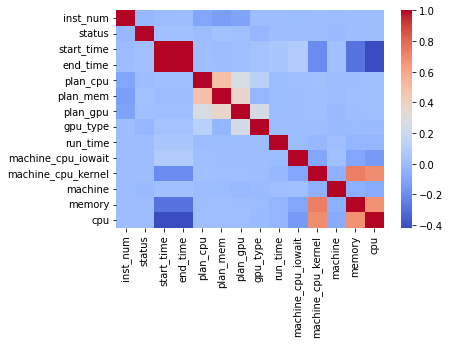

In [139]:
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()


In [127]:
# load the dataset
machine_metrics = pd.read_csv('pai_machine_metric.csv')
machine_metrics.head()

,worker_name,machine,start_time,end_time,machine_cpu_iowait,machine_cpu_kernel,machine_cpu_usr,machine_gpu,machine_load_1,machine_net_receive,machine_num_worker,machine_cpu
0,8fa54171acbc9f16704c03f137ac053ede9a97432cfc94...,5248e29b2b7f2b5f8b974608,2134401,2134599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,9b69319eb5d19b4ea2514fcb4d761c3d00be925b65f529...,5248e29b2b7f2b5f8b974608,2806218,2806331,0.006080,9.226264,40.158927,192.551088,89.731273,384588331.2,15.672816,49.391271
2,b37cd5d848323f23352464f71d3c27ef4796532ee09d59...,5248e29b2b7f2b5f8b974608,3084090,3084411,0.000699,10.140853,40.807522,150.497242,72.377214,702799379.2,14.234469,50.949074
3,8a3db37b3795c7c753963d0ef966df9703d39b9f918e1a...,5248e29b2b7f2b5f8b974608,2119980,2134354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,f114ac24745ec00da7107387afc99ed7cd8132530e8ef7...,5248e29b2b7f2b5f8b974608,2164803,2171278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
# Calculate the correlation matrix for the entire dataset
corr_matrix = machine_metrics.corr()

# Print the correlation matrix
print(corr_matrix)


                     start_time  end_time  machine_cpu_iowait  \
start_time             1.000000  0.999777            0.021040   
end_time               0.999777  1.000000            0.020958   
machine_cpu_iowait     0.021040  0.020958            1.000000   
machine_cpu_kernel     0.126228  0.125830           -0.106005   
machine_cpu_usr        0.114585  0.114031           -0.139512   
machine_gpu           -0.011421 -0.011000           -0.146288   
machine_load_1         0.144663  0.144025           -0.103960   
machine_net_receive    0.057766  0.057085           -0.103955   
machine_num_worker     0.196166  0.194608           -0.144434   
machine_cpu            0.143256  0.142657           -0.153091   
run_time              -0.022776 -0.001660           -0.004168   

                     machine_cpu_kernel  machine_cpu_usr  machine_gpu  \
start_time                     0.126228         0.114585    -0.011421   
end_time                       0.125830         0.114031    -0.011000   


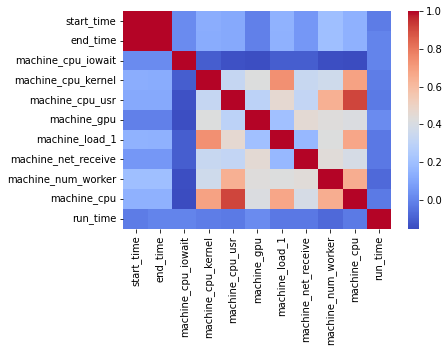

In [141]:
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()

# Here we are finding runtime beacuse we have no run time coloumn in our machine metrics

In [128]:
end_time=machine_metrics["end_time"]
start_time=machine_metrics["start_time"]

In [129]:
run_time=[]
for i,j in zip(end_time,start_time):
    r=i-j
    run_time.append(r)

In [130]:
run_time

[198,
 113,
 321,
 14374,
 6475,
 9709,
 9554,
 13761,
 13502,
 8196,
 3887,
 12090,
 6286,
 3392,
 16765,
 2837,
 5703,
 17684,
 13511,
 7822,
 7471,
 16125,
 830,
 8829,
 134,
 4904,
 3662,
 10278,
 6409,
 5002,
 3905,
 30776,
 3146,
 904,
 1644,
 1000,
 874,
 3218,
 4397,
 2435,
 1079,
 4240,
 5657,
 5277,
 913,
 3241,
 6363,
 6396,
 3309,
 7887,
 5424,
 2454,
 2367,
 7333,
 8263,
 6263,
 8744,
 5626,
 5819,
 11664,
 2207,
 1899,
 1294,
 471,
 522,
 969,
 1054,
 3792,
 191878,
 36581,
 43260,
 1054,
 38536,
 709,
 467,
 1033,
 60677,
 52183,
 41863,
 1673,
 1432,
 1447,
 1489,
 20579,
 8185,
 355,
 1195,
 1096,
 19607,
 235,
 242,
 234,
 5522,
 525,
 269,
 23,
 23,
 244,
 42532,
 4799,
 62,
 1925,
 24,
 12,
 13,
 191,
 51,
 65,
 837,
 824,
 265,
 484,
 213,
 836,
 169,
 728,
 217,
 8020,
 159,
 228,
 31722,
 8227,
 7982,
 28405,
 2670,
 8069,
 8651,
 1020,
 1091,
 5469,
 3584,
 1026,
 1854,
 5476,
 857,
 3847,
 17767,
 6941,
 10055,
 4866,
 6268,
 125,
 977,
 1681,
 214,
 458,
 2064

In [131]:
machine_metrics['run_time'] = run_time


In [132]:
machine_metrics

,worker_name,machine,start_time,end_time,machine_cpu_iowait,machine_cpu_kernel,machine_cpu_usr,machine_gpu,machine_load_1,machine_net_receive,machine_num_worker,machine_cpu,run_time
0,8fa54171acbc9f16704c03f137ac053ede9a97432cfc94...,5248e29b2b7f2b5f8b974608,2134401,2134599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,198
1,9b69319eb5d19b4ea2514fcb4d761c3d00be925b65f529...,5248e29b2b7f2b5f8b974608,2806218,2806331,0.006080,9.226264,40.158927,192.551088,89.731273,3.845883e+08,15.672816,49.391271,113
2,b37cd5d848323f23352464f71d3c27ef4796532ee09d59...,5248e29b2b7f2b5f8b974608,3084090,3084411,0.000699,10.140853,40.807522,150.497242,72.377214,7.027994e+08,14.234469,50.949074,321
3,8a3db37b3795c7c753963d0ef966df9703d39b9f918e1a...,5248e29b2b7f2b5f8b974608,2119980,2134354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14374
4,f114ac24745ec00da7107387afc99ed7cd8132530e8ef7...,5248e29b2b7f2b5f8b974608,2164803,2171278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6475
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,adee9d2bd7265e9c6a3a9b599ac147f1ad9cc34e56f0d5...,274faea7c2b83356d5de3b77,3132103,3133131,0.004562,4.102616,17.383334,51.223102,21.956170,5.512585e+08,5.043801,21.490512,1028
499995,fcf321bd4d26c893574e29d2e17740e3d61015b05a84f6...,274faea7c2b83356d5de3b77,3211881,3211982,0.002716,1.676733,17.442841,29.884499,18.782778,5.283590e+07,5.098641,19.122290,101
499996,bdc422a0fc9e4e9f47c4deea474db2bca79c1c626e369a...,274faea7c2b83356d5de3b77,3211882,3211973,0.002716,1.676733,17.442841,29.884499,18.782778,5.283590e+07,5.098641,19.122290,91
499997,32d57bdcdcca54e964f75fcba6c975f5b1eb5258727f81...,274faea7c2b83356d5de3b77,3244419,3244470,0.002670,1.787369,18.590296,21.676219,20.071826,5.256312e+07,5.345062,20.380335,51


In [133]:
machine_metrics.isnull().sum()

worker_name                0
machine                    0
start_time                 0
end_time                   0
machine_cpu_iowait     42111
machine_cpu_kernel     59422
machine_cpu_usr        43613
machine_gpu            53859
machine_load_1         50347
machine_net_receive    46597
machine_num_worker     52708
machine_cpu            60953
run_time                   0
dtype: int64

In [134]:
machine_metrics.dropna(inplace=True)

In [135]:
machine_metrics.head()

,worker_name,machine,start_time,end_time,machine_cpu_iowait,machine_cpu_kernel,machine_cpu_usr,machine_gpu,machine_load_1,machine_net_receive,machine_num_worker,machine_cpu,run_time
1,9b69319eb5d19b4ea2514fcb4d761c3d00be925b65f529...,5248e29b2b7f2b5f8b974608,2806218,2806331,0.006080,9.226264,40.158927,192.551088,89.731273,384588331.2,15.672816,49.391271,113
2,b37cd5d848323f23352464f71d3c27ef4796532ee09d59...,5248e29b2b7f2b5f8b974608,3084090,3084411,0.000699,10.140853,40.807522,150.497242,72.377214,702799379.2,14.234469,50.949074,321
7,7f1f4d76602d2071cb959a7ec47873e1007bee8046b2dd...,5248e29b2b7f2b5f8b974608,2659273,2673034,0.000614,7.683578,30.595101,498.010627,74.101198,314312965.7,12.209609,38.279293,13761
8,6ecadb953221add9491f244051114c7a2c4d5c63b7ffe3...,5248e29b2b7f2b5f8b974608,2660994,2674496,0.000622,7.427590,29.311445,494.623959,64.539163,318783570.7,12.199445,36.739657,13502
9,66ae3b379970ed9246766f1e7b473b5913f10917ae0aed...,5248e29b2b7f2b5f8b974608,2826419,2834615,0.005638,8.428983,37.379467,231.566358,79.317289,435045795.8,15.794257,45.814088,8196


In [136]:
task_table.isnull().sum()

inst_num              0
status                0
start_time            0
end_time              0
plan_cpu              0
plan_mem              0
plan_gpu              0
gpu_type              0
run_time              0
machine_cpu_iowait    0
machine_cpu_kernel    0
machine               0
memory                0
cpu                   0
dtype: int64

In [137]:
task_table.dropna(inplace=True)

In [20]:
task_table.head()

,job_name,task_name,inst_num,status,start_time,end_time,plan_cpu,plan_mem,plan_gpu,gpu_type
44,24332dee037bba41c8e0fceb,tensorflow,1,Terminated,1081646,1094419,600.0,29.296875,200.0,T4
46,b233af4f9e57c661d67a5be0,tensorflow,1,Terminated,1082995,1094430,600.0,29.296875,200.0,T4
47,46fc89d6895e36ce7d1e7ab8,tensorflow,1,Terminated,1094116,1094453,600.0,29.296875,25.0,T4
50,2b6f206c7f3b1a7e9b245377,PyTorchWorker,1,Terminated,1094446,1094492,1800.0,58.593750,100.0,T4
51,01cd6d7c0c55510abc9785f2,tensorflow,1,Terminated,1094430,1094514,600.0,29.296875,100.0,MISC


In [21]:
machine_metrics.drop('start_time', axis=1, inplace=True)

In [22]:
machine_metrics.drop('end_time', axis=1, inplace=True)

In [23]:
machine_metrics

,worker_name,machine,machine_cpu_iowait,machine_cpu_kernel,machine_cpu_usr,machine_gpu,machine_load_1,machine_net_receive,machine_num_worker,machine_cpu,run_time
1,9b69319eb5d19b4ea2514fcb4d761c3d00be925b65f529...,5248e29b2b7f2b5f8b974608,0.006080,9.226264,40.158927,192.551088,89.731273,3.845883e+08,15.672816,49.391271,113
2,b37cd5d848323f23352464f71d3c27ef4796532ee09d59...,5248e29b2b7f2b5f8b974608,0.000699,10.140853,40.807522,150.497242,72.377214,7.027994e+08,14.234469,50.949074,321
7,7f1f4d76602d2071cb959a7ec47873e1007bee8046b2dd...,5248e29b2b7f2b5f8b974608,0.000614,7.683578,30.595101,498.010627,74.101198,3.143130e+08,12.209609,38.279293,13761
8,6ecadb953221add9491f244051114c7a2c4d5c63b7ffe3...,5248e29b2b7f2b5f8b974608,0.000622,7.427590,29.311445,494.623959,64.539163,3.187836e+08,12.199445,36.739657,13502
9,66ae3b379970ed9246766f1e7b473b5913f10917ae0aed...,5248e29b2b7f2b5f8b974608,0.005638,8.428983,37.379467,231.566358,79.317289,4.350458e+08,15.794257,45.814088,8196
...,...,...,...,...,...,...,...,...,...,...,...
499994,adee9d2bd7265e9c6a3a9b599ac147f1ad9cc34e56f0d5...,274faea7c2b83356d5de3b77,0.004562,4.102616,17.383334,51.223102,21.956170,5.512585e+08,5.043801,21.490512,1028
499995,fcf321bd4d26c893574e29d2e17740e3d61015b05a84f6...,274faea7c2b83356d5de3b77,0.002716,1.676733,17.442841,29.884499,18.782778,5.283590e+07,5.098641,19.122290,101
499996,bdc422a0fc9e4e9f47c4deea474db2bca79c1c626e369a...,274faea7c2b83356d5de3b77,0.002716,1.676733,17.442841,29.884499,18.782778,5.283590e+07,5.098641,19.122290,91
499997,32d57bdcdcca54e964f75fcba6c975f5b1eb5258727f81...,274faea7c2b83356d5de3b77,0.002670,1.787369,18.590296,21.676219,20.071826,5.256312e+07,5.345062,20.380335,51


In [24]:
task_table

,job_name,task_name,inst_num,status,start_time,end_time,plan_cpu,plan_mem,plan_gpu,gpu_type
44,24332dee037bba41c8e0fceb,tensorflow,1,Terminated,1081646,1094419,600.0,29.296875,200.0,T4
46,b233af4f9e57c661d67a5be0,tensorflow,1,Terminated,1082995,1094430,600.0,29.296875,200.0,T4
47,46fc89d6895e36ce7d1e7ab8,tensorflow,1,Terminated,1094116,1094453,600.0,29.296875,25.0,T4
50,2b6f206c7f3b1a7e9b245377,PyTorchWorker,1,Terminated,1094446,1094492,1800.0,58.593750,100.0,T4
51,01cd6d7c0c55510abc9785f2,tensorflow,1,Terminated,1094430,1094514,600.0,29.296875,100.0,MISC
...,...,...,...,...,...,...,...,...,...,...
499994,76f391e1deed03eb87ade370,tensorflow,1,Terminated,4480035,4483303,600.0,29.296875,100.0,MISC
499995,64002d792fba760cddebd253,tensorflow,1,Terminated,4482654,4483307,600.0,29.296875,100.0,P100
499996,fe3990737fef541f2f4dc6dd,tensorflow,1,Terminated,4482651,4483320,600.0,29.296875,100.0,P100
499997,e162cfb7391cd08ff4bcc7e5,tensorflow,1,Terminated,4482936,4483322,600.0,29.296875,25.0,T4


In [25]:
#Here we are selectiong our columns
col_to_add = machine_metrics[['run_time', 'machine_cpu_iowait','machine_cpu_kernel','machine','machine_load_1','machine_cpu']]

In [26]:
#here we are merging our both tables
for col in col_to_add:
    task_table[col] = machine_metrics[col]

In [27]:
task_table.head()

,job_name,task_name,inst_num,status,start_time,end_time,plan_cpu,plan_mem,plan_gpu,gpu_type,run_time,machine_cpu_iowait,machine_cpu_kernel,machine,machine_load_1,machine_cpu
44,24332dee037bba41c8e0fceb,tensorflow,1,Terminated,1081646,1094419,600.0,29.296875,200.0,T4,NaN,NaN,NaN,NaN,NaN,NaN
46,b233af4f9e57c661d67a5be0,tensorflow,1,Terminated,1082995,1094430,600.0,29.296875,200.0,T4,NaN,NaN,NaN,NaN,NaN,NaN
47,46fc89d6895e36ce7d1e7ab8,tensorflow,1,Terminated,1094116,1094453,600.0,29.296875,25.0,T4,NaN,NaN,NaN,NaN,NaN,NaN
50,2b6f206c7f3b1a7e9b245377,PyTorchWorker,1,Terminated,1094446,1094492,1800.0,58.593750,100.0,T4,5424.0,0.000470,10.374486,5248e29b2b7f2b5f8b974608,145.808261,71.948594
51,01cd6d7c0c55510abc9785f2,tensorflow,1,Terminated,1094430,1094514,600.0,29.296875,100.0,MISC,2454.0,0.000894,6.380204,5248e29b2b7f2b5f8b974608,25.271145,26.066257


In [28]:
task_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400849 entries, 44 to 499998
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   job_name            400849 non-null  object 
 1   task_name           400849 non-null  object 
 2   inst_num            400849 non-null  int64  
 3   status              400849 non-null  object 
 4   start_time          400849 non-null  int64  
 5   end_time            400849 non-null  int64  
 6   plan_cpu            400849 non-null  float64
 7   plan_mem            400849 non-null  float64
 8   plan_gpu            400849 non-null  float64
 9   gpu_type            400849 non-null  object 
 10  run_time            328573 non-null  float64
 11  machine_cpu_iowait  328573 non-null  float64
 12  machine_cpu_kernel  328573 non-null  float64
 13  machine             328573 non-null  object 
 14  machine_load_1      328573 non-null  float64
 15  machine_cpu         328573 non-nu

In [29]:
task_table.isnull().sum()

job_name                  0
task_name                 0
inst_num                  0
status                    0
start_time                0
end_time                  0
plan_cpu                  0
plan_mem                  0
plan_gpu                  0
gpu_type                  0
run_time              72276
machine_cpu_iowait    72276
machine_cpu_kernel    72276
machine               72276
machine_load_1        72276
machine_cpu           72276
dtype: int64

In [30]:
task_table.drop(['job_name', 'task_name'], axis=1, inplace=True)

In [31]:
task_table.dropna(inplace=True)

In [32]:
task_table

,inst_num,status,start_time,end_time,plan_cpu,plan_mem,plan_gpu,gpu_type,run_time,machine_cpu_iowait,machine_cpu_kernel,machine,machine_load_1,machine_cpu
50,1,Terminated,1094446,1094492,1800.0,58.593750,100.0,T4,5424.0,0.000470,10.374486,5248e29b2b7f2b5f8b974608,145.808261,71.948594
51,1,Terminated,1094430,1094514,600.0,29.296875,100.0,MISC,2454.0,0.000894,6.380204,5248e29b2b7f2b5f8b974608,25.271145,26.066257
52,50,Terminated,1089298,1094522,400.0,19.531250,50.0,MISC,2367.0,0.001701,24.821035,5248e29b2b7f2b5f8b974608,215.624891,59.594216
54,1,Terminated,1094446,1094526,600.0,29.296875,100.0,MISC,8263.0,0.005904,8.922031,5248e29b2b7f2b5f8b974608,81.486085,46.221823
55,1,Terminated,1094103,1094544,1000.0,19.550781,50.0,T4,6263.0,0.001435,8.766022,5248e29b2b7f2b5f8b974608,95.594414,61.367088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,1,Terminated,4480035,4483303,600.0,29.296875,100.0,MISC,1028.0,0.004562,4.102616,274faea7c2b83356d5de3b77,21.956170,21.490512
499995,1,Terminated,4482654,4483307,600.0,29.296875,100.0,P100,101.0,0.002716,1.676733,274faea7c2b83356d5de3b77,18.782778,19.122290
499996,1,Terminated,4482651,4483320,600.0,29.296875,100.0,P100,91.0,0.002716,1.676733,274faea7c2b83356d5de3b77,18.782778,19.122290
499997,1,Terminated,4482936,4483322,600.0,29.296875,25.0,T4,51.0,0.002670,1.787369,274faea7c2b83356d5de3b77,20.071826,20.380335


In [33]:
#Here we are converting our categorical data into Encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler
# Convert object columns to int label encoding
label_encoder = LabelEncoder()
task_table['gpu_type'] = label_encoder.fit_transform(task_table['gpu_type'])
task_table['status'] = label_encoder.fit_transform(task_table['status'])
task_table['machine'] = label_encoder.fit_transform(task_table['machine'])
task_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 328573 entries, 50 to 499998
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   inst_num            328573 non-null  int64  
 1   status              328573 non-null  int64  
 2   start_time          328573 non-null  int64  
 3   end_time            328573 non-null  int64  
 4   plan_cpu            328573 non-null  float64
 5   plan_mem            328573 non-null  float64
 6   plan_gpu            328573 non-null  float64
 7   gpu_type            328573 non-null  int64  
 8   run_time            328573 non-null  float64
 9   machine_cpu_iowait  328573 non-null  float64
 10  machine_cpu_kernel  328573 non-null  float64
 11  machine             328573 non-null  int64  
 12  machine_load_1      328573 non-null  float64
 13  machine_cpu         328573 non-null  float64
dtypes: float64(8), int64(6)
memory usage: 37.6 MB


In [35]:
task_table.shape

(328573, 14)

In [37]:
task_table = task_table.rename({'machine_load_1': 'memory', 'machine_cpu': 'cpu'}, axis=1)  # new method

In [38]:
task_table

,inst_num,status,start_time,end_time,plan_cpu,plan_mem,plan_gpu,gpu_type,run_time,machine_cpu_iowait,machine_cpu_kernel,machine,memory,cpu
50,1,2,1094446,1094492,1800.0,58.593750,100.0,2,5424.0,0.000470,10.374486,257,145.808261,71.948594
51,1,2,1094430,1094514,600.0,29.296875,100.0,0,2454.0,0.000894,6.380204,257,25.271145,26.066257
52,50,2,1089298,1094522,400.0,19.531250,50.0,0,2367.0,0.001701,24.821035,257,215.624891,59.594216
54,1,2,1094446,1094526,600.0,29.296875,100.0,0,8263.0,0.005904,8.922031,257,81.486085,46.221823
55,1,2,1094103,1094544,1000.0,19.550781,50.0,2,6263.0,0.001435,8.766022,257,95.594414,61.367088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499994,1,2,4480035,4483303,600.0,29.296875,100.0,0,1028.0,0.004562,4.102616,120,21.956170,21.490512
499995,1,2,4482654,4483307,600.0,29.296875,100.0,1,101.0,0.002716,1.676733,120,18.782778,19.122290
499996,1,2,4482651,4483320,600.0,29.296875,100.0,1,91.0,0.002716,1.676733,120,18.782778,19.122290
499997,1,2,4482936,4483322,600.0,29.296875,25.0,2,51.0,0.002670,1.787369,120,20.071826,20.380335


In [39]:
#This is our output features we stored in a target
target = task_table[['run_time','cpu','memory']]

In [40]:
target

,run_time,cpu,memory
50,5424.0,71.948594,145.808261
51,2454.0,26.066257,25.271145
52,2367.0,59.594216,215.624891
54,8263.0,46.221823,81.486085
55,6263.0,61.367088,95.594414
...,...,...,...
499994,1028.0,21.490512,21.956170
499995,101.0,19.122290,18.782778
499996,91.0,19.122290,18.782778
499997,51.0,20.380335,20.071826


In [42]:
p=5
pr = []
for index, row in target.iterrows():
    k=row['run_time'], row['cpu'], row['memory']          #if it gave an error so ignore it and run further cells
    pr.append(k)

In [43]:
pr[0],pr[1],pr[2]

((5424.0, 71.94859417, 145.8082606),
 (2454.0, 26.06625703, 25.27114484),
 (2367.0, 59.59421586, 215.6248914))

In [44]:
type(pr[0])

tuple

In [45]:
#This our input features we stored in a variable val
val=task_table[['plan_cpu', 'inst_num', 'status','plan_mem','plan_gpu','gpu_type','start_time','end_time']]

In [46]:
val

,plan_cpu,inst_num,status,plan_mem,plan_gpu,gpu_type,start_time,end_time
50,1800.0,1,2,58.593750,100.0,2,1094446,1094492
51,600.0,1,2,29.296875,100.0,0,1094430,1094514
52,400.0,50,2,19.531250,50.0,0,1089298,1094522
54,600.0,1,2,29.296875,100.0,0,1094446,1094526
55,1000.0,1,2,19.550781,50.0,2,1094103,1094544
...,...,...,...,...,...,...,...,...
499994,600.0,1,2,29.296875,100.0,0,4480035,4483303
499995,600.0,1,2,29.296875,100.0,1,4482654,4483307
499996,600.0,1,2,29.296875,100.0,1,4482651,4483320
499997,600.0,1,2,29.296875,25.0,2,4482936,4483322


In [47]:
#Here we are making 5 5 instances 
import pandas as pd
sets_of_5 = []
# iterate over the dataframe by increments of 5 rows
for i in range(0, len(val), 5):
    # extract the next 5 rows from the dataframe
    set_of_5 = val.iloc[i:i+5].reset_index(drop=True)
    # reset the index and drop the column names
    set_of_5.columns = ["" for col in set_of_5.columns]
    # append the set of 5 rows to the list
    sets_of_5.append(set_of_5)

# print the list of sets of 5 rows
print(sets_of_5[0])


                                                       
0  1800.0   1  2  58.593750  100.0  2  1094446  1094492
1   600.0   1  2  29.296875  100.0  0  1094430  1094514
2   400.0  50  2  19.531250   50.0  0  1089298  1094522
3   600.0   1  2  29.296875  100.0  0  1094446  1094526
4  1000.0   1  2  19.550781   50.0  2  1094103  1094544


In [48]:
val=sets_of_5

In [49]:
len(val)

65715

* Here we have to variables name val and pr 
* in a varaible val we have our set of 5 5 
* and in a variable pr we have a set of 6th values which we have to give as target value on the basis of previous 5 sets our model predicts the 6th instance

In [50]:
len(pr),len(val)

(328573, 65715)

In [51]:
pr = pr[:len(val)]    

In [52]:
len(pr),len(val)

(65715, 65715)

In [53]:
type(pr[1]),type(val[1])

(tuple, pandas.core.frame.DataFrame)

In [45]:
#Here we are converting a data into Type list Because we have to convert Our Dataframe 
#into list to merge a above val and pr to make a single row becuase val type is list and pr is dataframe
import pandas as pd
from itertools import chain
# create a sample DataFrame
df = val[1]
# convert DataFrame to 1D list using nested list comprehension
flat_list = [item for sublist in df.values.tolist() for item in sublist]
# convert DataFrame to 1D list using itertools.chain()
flat_list = list(chain.from_iterable(df.values.tolist()))

print(flat_list)


[600.0, 50.0, 2.0, 19.53125, 50.0, 0.0, 1093054.0, 1094546.0, 600.0, 1.0, 2.0, 29.296875, 100.0, 2.0, 1094523.0, 1094547.0, 600.0, 1.0, 2.0, 29.296875, 100.0, 0.0, 1094461.0, 1094561.0, 600.0, 1.0, 2.0, 29.296875, 100.0, 0.0, 1094500.0, 1094563.0, 800.0, 1.0, 2.0, 19.53125, 100.0, 2.0, 1094524.0, 1094578.0]


In [55]:
#Here we are making a time series dataset by merging a val and pr 
from itertools import chain
dataset = []
for i in range(len(pr)):
    df = val[i]
# convert DataFrame to 1D list using nested list comprehension
    flat_list = [item for sublist in df.values.tolist() for item in sublist]
# convert DataFrame to 1D list using itertools.chain()
    flat_list = list(chain.from_iterable(df.values.tolist()))
    row = list(flat_list)
    #row.append(list(pr[i]))
    str_list =list(pr[i])
    float_list = [float(x) for x in str_list]
    k=float_list
    float_list = k
    split_list = [str(x).split(',') for x in float_list]
    #print(split_list[2])
    row.append(split_list[0])
    row.append(split_list[1])
    row.append(split_list[2])
    dataset.append(row)

In [56]:
dataset[1]

[600.0,
 50.0,
 2.0,
 19.53125,
 50.0,
 0.0,
 1093054.0,
 1094546.0,
 600.0,
 1.0,
 2.0,
 29.296875,
 100.0,
 2.0,
 1094523.0,
 1094547.0,
 600.0,
 1.0,
 2.0,
 29.296875,
 100.0,
 0.0,
 1094461.0,
 1094561.0,
 600.0,
 1.0,
 2.0,
 29.296875,
 100.0,
 0.0,
 1094500.0,
 1094563.0,
 800.0,
 1.0,
 2.0,
 19.53125,
 100.0,
 2.0,
 1094524.0,
 1094578.0,
 ['2454.0'],
 ['26.06625703'],
 ['25.27114484']]

In [57]:
len(dataset), np.array(dataset).shape,type(dataset)

/tmp/ipykernel_7665/3057848479.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  len(dataset), np.array(dataset).shape,type(dataset)


(65715, (65715,), list)

In [58]:
#Here we are shuffling our data becuase shuffling the data before feed to 
#our model is best practice there is no hard and fast rule behind shuffling the data
dataset = np.array(dataset)
np.random.shuffle(dataset)
np.random.shuffle(dataset)
dataset.shape

/tmp/ipykernel_7665/543170479.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  dataset = np.array(dataset)


(65715,)

In [59]:
dataset[3]

[600.0,
 1.0,
 2.0,
 29.296875,
 100.0,
 2.0,
 3949457.0,
 3949793.0,
 1800.0,
 1.0,
 2.0,
 58.59375,
 100.0,
 1.0,
 3948221.0,
 3949813.0,
 600.0,
 1.0,
 2.0,
 29.296875,
 100.0,
 0.0,
 3949788.0,
 3949822.0,
 1800.0,
 1.0,
 2.0,
 58.59375,
 100.0,
 1.0,
 3948291.0,
 3949832.0,
 600.0,
 1.0,
 2.0,
 29.296875,
 100.0,
 2.0,
 3949822.0,
 3949846.0,
 ['2456.0'],
 ['38.22259437'],
 ['95.49229722']]

In [60]:


dataset2 = list(dataset)                           # dataset2 = dataset
append_item = dataset[0]                           # length = len(dataset2)
                                                   # # shape = dataset2[0].shape
dataset2[0] = ["v1","v2","v3","v4","v5","v6","v7","v8","v9","v10","v11","v12","v13","v14","v15","v16","v17","v18","v19","v20","v21","v22","v23","v24","v25","v26","v27","v28","v29","v30","v31","v32","v33","v34","v35","v36","v37","v38","v39","v40","target","target1","target2"]  # print(length,type(dataset2))

dataset2.append(append_item)
len(dataset2),len(dataset)                      # header = ["value1","value2","value3","value4","value5","target"]
                                                # dataset2 = np.insert(dataset2,0,header)
                                                # # dataset2 = dataset2.reshape( (length+1, 6 ) )
                                                # # len(dataset2),dataset2.shap

(65716, 65715)

In [61]:
np.array(dataset2).shape, dataset2[:10]

/tmp/ipykernel_7665/2837045535.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(dataset2).shape, dataset2[:10]


((65716,),
 [['v1',
   'v2',
   'v3',
   'v4',
   'v5',
   'v6',
   'v7',
   'v8',
   'v9',
   'v10',
   'v11',
   'v12',
   'v13',
   'v14',
   'v15',
   'v16',
   'v17',
   'v18',
   'v19',
   'v20',
   'v21',
   'v22',
   'v23',
   'v24',
   'v25',
   'v26',
   'v27',
   'v28',
   'v29',
   'v30',
   'v31',
   'v32',
   'v33',
   'v34',
   'v35',
   'v36',
   'v37',
   'v38',
   'v39',
   'v40',
   'target',
   'target1',
   'target2'],
  [600.0,
   16.0,
   2.0,
   4.0,
   25.0,
   0.0,
   2730156.0,
   2730363.0,
   600.0,
   1.0,
   2.0,
   29.296875,
   50.0,
   0.0,
   2730137.0,
   2730385.0,
   600.0,
   1.0,
   2.0,
   29.296875,
   50.0,
   0.0,
   2716030.0,
   2730399.0,
   1000.0,
   1.0,
   2.0,
   19.55078125,
   50.0,
   2.0,
   2730022.0,
   2730403.0,
   600.0,
   1.0,
   2.0,
   29.296875,
   25.0,
   0.0,
   2730345.0,
   2730416.0,
   ['14919.0'],
   ['29.41630593'],
   ['42.92190063']],
  [600.0,
   1.0,
   2.0,
   29.296875,
   25.0,
   0.0,
   3554585.0,
   35

In [62]:
dataset2[5]

[600.0,
 1.0,
 2.0,
 29.296875,
 10.0,
 0.0,
 3230569.0,
 3235183.0,
 600.0,
 1.0,
 2.0,
 29.296875,
 100.0,
 2.0,
 3234775.0,
 3235201.0,
 600.0,
 30.0,
 2.0,
 29.296875,
 25.0,
 0.0,
 3232323.0,
 3235207.0,
 600.0,
 20.0,
 2.0,
 19.53125,
 25.0,
 0.0,
 3058376.0,
 3235219.0,
 600.0,
 1.0,
 2.0,
 29.296875,
 100.0,
 0.0,
 3232845.0,
 3235220.0,
 ['6369.0'],
 ['33.51990457'],
 ['37.30859044']]

In [63]:
import csv
with open('alibaba2020times.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(dataset2)

In [142]:
data = pd.read_csv("alibaba2020times.csv")

/tmp/ipykernel_7665/2345711845.py:1: DtypeWarning: Columns (24,25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("alibaba2020times.csv")


In [143]:
#So as we have 8 columns in our task features so we make a 5 – 5 sets of 
#each columns to give to our time series model that’s why it’s looks like 40 inputs . 
#our purpose is that to apply time series . so we give this to our model and we give 5 
#instances to our model and  on the basis of these five instances our model predicts the sixth instance it self
data

,v1,v2,v3,v4,v5,v6,v7,v8,v9,v10,...,v34,v35,v36,v37,v38,v39,v40,target,target1,target2
0,600.0,16.0,2.0,4.000000,25.0,0.0,2730156.0,2730363.0,600.0,1.0,...,1.0,2.0,29.296875,25.0,0.0,2730345.0,2730416.0,['14919.0'],['29.41630593'],['42.92190063']
1,600.0,1.0,2.0,29.296875,25.0,0.0,3554585.0,3554656.0,600.0,1.0,...,1.0,2.0,29.296875,100.0,0.0,3554280.0,3554684.0,['13288.0'],['36.41217966'],['24.08201577']
2,600.0,1.0,2.0,29.296875,100.0,2.0,3949457.0,3949793.0,1800.0,1.0,...,1.0,2.0,29.296875,100.0,2.0,3949822.0,3949846.0,['2456.0'],['38.22259437'],['95.49229722']
3,600.0,1.0,2.0,29.296875,50.0,0.0,2430520.0,2444421.0,600.0,1.0,...,1.0,2.0,29.296875,25.0,0.0,2432036.0,2444437.0,['2555.0'],['45.40453017'],['47.28871917']
4,600.0,1.0,2.0,29.296875,10.0,0.0,3230569.0,3235183.0,600.0,1.0,...,1.0,2.0,29.296875,100.0,0.0,3232845.0,3235220.0,['6369.0'],['33.51990457'],['37.30859044']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65710,600.0,1.0,2.0,29.296875,100.0,1.0,4281739.0,4284616.0,600.0,1.0,...,1.0,2.0,29.296875,100.0,0.0,4284133.0,4284664.0,['8833.0'],['38.02775901'],['51.21590286']
65711,1000.0,1.0,2.0,19.550781,50.0,2.0,3029371.0,3029563.0,600.0,4.0,...,1.0,2.0,29.296875,25.0,0.0,3029386.0,3029580.0,['4975.0'],['62.15559927'],['319.3685893']
65712,200.0,80.0,2.0,14.648438,20.0,0.0,4158208.0,4158896.0,1200.0,1.0,...,16.0,2.0,4.000000,25.0,0.0,4158645.0,4158929.0,['745.0'],['62.24629063'],['97.45993484']
65713,600.0,1.0,2.0,29.296875,100.0,2.0,1439245.0,1439400.0,600.0,3.0,...,1.0,2.0,19.550781,50.0,2.0,1438834.0,1439443.0,['28215.0'],['46.32959927'],['54.62455561']


                     start_time  end_time  machine_cpu_iowait  \
start_time             1.000000  0.999777            0.021040   
end_time               0.999777  1.000000            0.020958   
machine_cpu_iowait     0.021040  0.020958            1.000000   
machine_cpu_kernel     0.126228  0.125830           -0.106005   
machine_cpu_usr        0.114585  0.114031           -0.139512   
machine_gpu           -0.011421 -0.011000           -0.146288   
machine_load_1         0.144663  0.144025           -0.103960   
machine_net_receive    0.057766  0.057085           -0.103955   
machine_num_worker     0.196166  0.194608           -0.144434   
machine_cpu            0.143256  0.142657           -0.153091   
run_time              -0.022776 -0.001660           -0.004168   

                     machine_cpu_kernel  machine_cpu_usr  machine_gpu  \
start_time                     0.126228         0.114585    -0.011421   
end_time                       0.125830         0.114031    -0.011000   


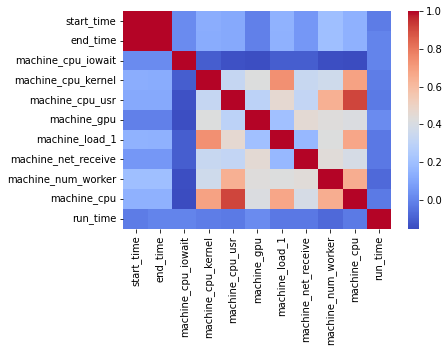

In [144]:
# Calculate the correlation matrix for the entire dataset
corr_matrix = machine_metrics.corr()

# Print the correlation matrix
print(corr_matrix)
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.show()


#  In the Below lines of code we are just converting our data types in float before give our model becuase Machine learning only knows abouts numbers
# And removing some garbage like commas space and normizling our data

In [66]:
my_target=[]
for i in range(0,65715):
    my_string = str(data["target"][i])
    my_float = float(my_string.strip("[]").replace("'", ""))
    my_target.append(my_float)

In [67]:
my_target

[14919.0,
 13288.0,
 2456.0,
 2555.0,
 6369.0,
 71.0,
 1161.0,
 481.0,
 976.0,
 708.0,
 47409.0,
 11656.0,
 4351.0,
 4836.0,
 1989.0,
 2452.0,
 31089.0,
 61.0,
 344.0,
 685.0,
 226.0,
 11576.0,
 2459.0,
 391.0,
 579.0,
 32.0,
 4145.0,
 6605.0,
 853.0,
 5881.0,
 61.0,
 14587.0,
 5513.0,
 719.0,
 61165.0,
 1454.0,
 5205.0,
 18999.0,
 6380.0,
 1594.0,
 367.0,
 208.0,
 3063.0,
 1927.0,
 1926.0,
 18622.0,
 272.0,
 10457.0,
 10334.0,
 117.0,
 204.0,
 106.0,
 10510.0,
 12471.0,
 278.0,
 376.0,
 716.0,
 68.0,
 6958.0,
 6342.0,
 1786.0,
 3039.0,
 686.0,
 23.0,
 1459.0,
 189.0,
 716.0,
 1029.0,
 1911.0,
 1237.0,
 1209.0,
 18101.0,
 636.0,
 3459.0,
 787.0,
 104188.0,
 5581.0,
 455.0,
 1837.0,
 490.0,
 4703.0,
 3857.0,
 3066.0,
 71.0,
 535.0,
 93.0,
 307.0,
 2087.0,
 364.0,
 202.0,
 11932.0,
 211.0,
 50409.0,
 596.0,
 1204.0,
 2526.0,
 867.0,
 2401.0,
 35.0,
 134238.0,
 11254.0,
 1495.0,
 1435.0,
 6224.0,
 905.0,
 8578.0,
 8107.0,
 90.0,
 10466.0,
 223.0,
 1745.0,
 2536.0,
 583.0,
 2571.0,
 11989.

In [68]:
my_target = pd.DataFrame({'my_target': my_target})

In [69]:
my_target["my_target"]

0        14919.0
1        13288.0
2         2456.0
3         2555.0
4         6369.0
          ...   
65710     8833.0
65711     4975.0
65712      745.0
65713    28215.0
65714      241.0
Name: my_target, Length: 65715, dtype: float64

In [70]:
my_target1=[]
for i in range(0,65715):
    my_string = str(data["target1"][i])
    my_float = float(my_string.strip("[]").replace("'", ""))
    my_target1.append(my_float)

In [71]:
my_target1 = pd.DataFrame({'my_target1': my_target1})

In [72]:
my_target2=[]
for i in range(0,65715):
    my_string = str(data["target2"][i])
    my_float = float(my_string.strip("[]").replace("'", ""))
    my_target2.append(my_float)

In [73]:
my_target2 = pd.DataFrame({'my_target2': my_target2})

In [74]:
data['target'] = my_target['my_target']

In [75]:
data['target1'] = my_target1['my_target1']

In [76]:
data['target2'] = my_target2['my_target2']

In [77]:
my_v25=[]
for i in range(0,65715):
    my_string = str(data["v25"][i])
    my_float = float(my_string.strip("[]").replace("'", ""))
    my_v25.append(my_float)

In [78]:
my_v25 = pd.DataFrame({'my_v25': my_v25})

In [79]:
my_v26=[]
for i in range(0,65715):
    my_string = str(data["v26"][i])
    my_float = float(my_string.strip("[]").replace("'", ""))
    my_v26.append(my_float)

In [80]:
my_v26 = pd.DataFrame({'my_v26': my_v26})

In [81]:
my_v27=[]
for i in range(0,65715):
    my_string = str(data["v27"][i])
    my_float = float(my_string.strip("[]").replace("'", ""))
    my_v27.append(my_float)

In [82]:
my_v27 = pd.DataFrame({'my_v27': my_v27})

In [83]:
data['v25'] = my_v25['my_v25']
data['v26'] = my_v26['my_v26']
data['v27'] = my_v27['my_v27']

In [84]:
data.dropna(inplace=True)

In [85]:
data.isnull().sum()

v1         0
v2         0
v3         0
v4         0
v5         0
v6         0
v7         0
v8         0
v9         0
v10        0
v11        0
v12        0
v13        0
v14        0
v15        0
v16        0
v17        0
v18        0
v19        0
v20        0
v21        0
v22        0
v23        0
v24        0
v25        0
v26        0
v27        0
v28        0
v29        0
v30        0
v31        0
v32        0
v33        0
v34        0
v35        0
v36        0
v37        0
v38        0
v39        0
v40        0
target     0
target1    0
target2    0
dtype: int64

In [86]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65714 entries, 0 to 65714
Data columns (total 43 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   v1       65714 non-null  float64
 1   v2       65714 non-null  float64
 2   v3       65714 non-null  float64
 3   v4       65714 non-null  float64
 4   v5       65714 non-null  float64
 5   v6       65714 non-null  float64
 6   v7       65714 non-null  float64
 7   v8       65714 non-null  float64
 8   v9       65714 non-null  float64
 9   v10      65714 non-null  float64
 10  v11      65714 non-null  float64
 11  v12      65714 non-null  float64
 12  v13      65714 non-null  float64
 13  v14      65714 non-null  float64
 14  v15      65714 non-null  float64
 15  v16      65714 non-null  float64
 16  v17      65714 non-null  float64
 17  v18      65714 non-null  float64
 18  v19      65714 non-null  float64
 19  v20      65714 non-null  float64
 20  v21      65714 non-null  float64
 21  v22      657

In [87]:
# IN THIS SECTIONS WE ARE SELECTIONG OUR INPUT AND TARGET FEATURES
Y = data[["target","target1","target2"]]
X = data.drop(columns = ["target","target1","target2"] )
X.head() ,Y.head()


(      v1    v2   v3         v4     v5   v6         v7         v8      v9  v10  \
 0  600.0  16.0  2.0   4.000000   25.0  0.0  2730156.0  2730363.0   600.0  1.0   
 1  600.0   1.0  2.0  29.296875   25.0  0.0  3554585.0  3554656.0   600.0  1.0   
 2  600.0   1.0  2.0  29.296875  100.0  2.0  3949457.0  3949793.0  1800.0  1.0   
 3  600.0   1.0  2.0  29.296875   50.0  0.0  2430520.0  2444421.0   600.0  1.0   
 4  600.0   1.0  2.0  29.296875   10.0  0.0  3230569.0  3235183.0   600.0  1.0   
 
    ...        v31        v32    v33  v34  v35        v36    v37  v38  \
 0  ...  2730022.0  2730403.0  600.0  1.0  2.0  29.296875   25.0  0.0   
 1  ...  3554119.0  3554674.0  600.0  1.0  2.0  29.296875  100.0  0.0   
 2  ...  3948291.0  3949832.0  600.0  1.0  2.0  29.296875  100.0  2.0   
 3  ...  2436884.0  2444435.0  600.0  1.0  2.0  29.296875   25.0  0.0   
 4  ...  3058376.0  3235219.0  600.0  1.0  2.0  29.296875  100.0  0.0   
 
          v39        v40  
 0  2730345.0  2730416.0  
 1  3554280.

In [88]:
type(X),type(Y)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

In [89]:
X.head(1) ,Y.head(1)

(      v1    v2   v3   v4    v5   v6         v7         v8     v9  v10  ...  \
 0  600.0  16.0  2.0  4.0  25.0  0.0  2730156.0  2730363.0  600.0  1.0  ...   
 
          v31        v32    v33  v34  v35        v36   v37  v38        v39  \
 0  2730022.0  2730403.0  600.0  1.0  2.0  29.296875  25.0  0.0  2730345.0   
 
          v40  
 0  2730416.0  
 
 [1 rows x 40 columns],
     target    target1    target2
 0  14919.0  29.416306  42.921901)

In [90]:
#Here we are normalizing our data
from sklearn import preprocessing
import numpy as np
x_array =X
X = preprocessing.normalize(x_array)
print(X)

[[6.95294129e-05 1.85411768e-06 2.31764710e-07 ... 0.00000000e+00
  3.16398808e-01 3.16407036e-01]
 [5.33837568e-05 8.89729281e-08 1.77945856e-07 ... 0.00000000e+00
  3.16234699e-01 3.16270644e-01]
 [4.80410599e-05 8.00684331e-08 1.60136866e-07 ... 1.60136866e-07
  3.16256059e-01 3.16257980e-01]
 ...
 [1.52077898e-05 6.08311594e-06 1.52077898e-07 ... 0.00000000e+00
  3.16218996e-01 3.16240591e-01]
 [1.31849979e-04 2.19749965e-07 4.39499930e-07 ... 4.39499930e-07
  3.16183721e-01 3.16317549e-01]
 [1.23273566e-04 2.05455944e-07 4.10911888e-07 ... 4.10911888e-07
  3.17453677e-01 3.17486345e-01]]


In [91]:
Y=np.array(Y)

In [98]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
# split the data into training and testing sets using a 70:30 ratio
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [93]:
y_test[0]

array([13.        , 30.55859734, 31.60065289])

In [94]:
model = MLPRegressor(hidden_layer_sizes=(200, 100), activation='relu', solver='adam', random_state=42)

In [95]:
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(200, 100), random_state=42)

In [96]:
# Save the model
import pickle
with open('alibaba_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [101]:
y_pred = model.predict(X_test)
score = model.score(X_test, y_test)
print(y_pred[0])

[7121.02763753   47.55754465   94.46791624]


In [102]:
print(score)

-0.0063607440442681185


In [103]:
y_pred[2]

array([7120.75997263,   47.5557729 ,   94.46439558])

In [104]:
y_test[2]

array([557.        ,  59.28349969, 189.1005335 ])

In [109]:
diff = y_test[2] - y_pred[2]

In [108]:
diff

array([-6997.96003243,   -18.01639056,   -61.58152064])

In [110]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error:', mse)

Mean squared error: 114575539.24300547


In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
# Test the model on the test set
y_pred = model.predict(X_test)

# Calculate mean absolute error (MAE), root mean squared error (RMSE), and R-squared score
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Calculate average waiting time
average_waiting_time = np.mean(y_pred)

# Print the evaluation metrics and average waiting time
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R-squared Score: {r2:.2f}")
print(f"Average Waiting Time: {average_waiting_time:.2f}")

Mean Absolute Error: 2975.30
Root Mean Squared Error: 10704.00
R-squared Score: -0.01
Average Waiting Time: 2421.05


# In the below cell we are predicting future

In [112]:
import pandas as pd
import numpy as np
import joblib

# Load the trained model and scaler
model = joblib.load('alibaba_model.pkl')
scaler = joblib.load('scaler.pkl')

# Load the input data
# HERE WE ARE GIVING OUR DATA 5 instances of our task features to and it predicts the future you can see below
input_data = pd.read_csv('alibabaprediction.csv')
from sklearn import preprocessing
import numpy as np

X = preprocessing.normalize(input_data)
predictions = model.predict(X)

# Print the predicted values for runtime, memory and CPU
print('Predicted runtime:', predictions[:, 0])
print('Predicted memory usage:', predictions[:, 1])
print('Predicted CPU usage:', predictions[:, 2])


Predicted runtime: [7121.65125553]
Predicted memory usage: [47.5616945]
Predicted CPU usage: [94.47623419]


# In The below lines of code we are used a Deep learning approach just extra work

In [ ]:
datad= pd.read_csv('alibabaprediction.csv')
datad.info()

In [ ]:
data = pd.read_csv("alibaba2020times.csv")

In [114]:
from tensorflow.keras import models, layers

2023-03-14 20:56:54.720919: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-14 20:56:54.755524: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-14 20:56:54.755542: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [115]:
model = models.Sequential()

model.add(layers.Dense(128, activation='relu', input_shape=(40,)))
model.add(layers.BatchNormalization())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.BatchNormalization())

model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(3))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

2023-03-14 20:56:56.591983: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-14 20:56:56.592012: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-14 20:56:56.592041: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (bilal): /proc/driver/nvidia/version does not exist
2023-03-14 20:56:56.592715: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [116]:
history = model.fit(X_train, y_train, epochs=500, verbose=0)

In [117]:
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

617/617 [==============================] - 1s 734us/step - loss: 114657760.0000 - mae: 2996.2129


<Figure size 432x288 with 0 Axes>

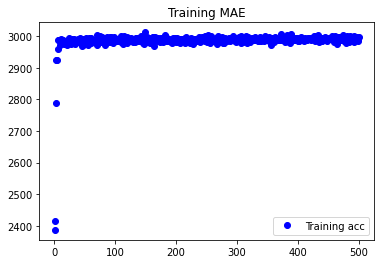

<Figure size 432x288 with 0 Axes>

In [118]:

import matplotlib.pyplot as plt

acc = history.history['mae']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.title('Training MAE')
plt.legend()
plt.figure()



In [119]:
model.save("alibaba2020.h5")

In [120]:
from tensorflow.keras.models import load_model

loaded_model = load_model("alibaba2020.h5")

In [121]:
# Load the trained model
from tensorflow import keras

model = keras.models.load_model('alibaba2020.h5')

# Load the data for prediction
import numpy as np

x = pd.read_csv('alibabaprediction.csv')
x = preprocessing.normalize(x)

# Preprocess the data
#X = preprocess(data)

# Make predictions
y_pred = model.predict(x)

# Print the predictions
print(y_pred)


1/1 [==============================] - 0s 98ms/step
[[7284.431      57.120533  117.09225 ]]
